# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 5
shuffle_batch = False

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.5 # for saving the best trained models 
max_epoch_num = 150 # max num of epoches 
train_acc_exit=0.92 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.92 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [6]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_rnn_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [7]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 256
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
dropout_rate = 0.0
bidirectional = True
use_attention = False
reduction_method = torch.sum

learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.1380312740802765, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00693609620211646, 'overlap rate': 0.09225409068167209}
evaluation performance: {'loss': 3.199429249763489, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.006923005654243752, 'overlap rate': 0.08791116001084447}

Current epoch: 10, 
training performance: {'loss': 2.869194042682648, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01551298756385222, 'overlap rate': 0.17222225088626147}
evaluation performance: {'loss': 3.139606034755707, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013622092199511826, 'overlap rate': 0.09929423406720161}

Current epoch: 15, 
training performance: {'loss': 2.6825938642024996, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.023976200353354217, 'overlap rate': 0.2238537285476923}
evaluation performance: {'loss': 3.1150349497795107, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.021517

KeyboardInterrupt: ignored

## Hyperparameter set 2

In [ ]:
hidden_size = 256
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.190484327077866, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.05027975793927908, 'overlap rate': 0.08120723506435752}
evaluation performance: {'loss': 3.1420214653015135, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.05999528793618083, 'overlap rate': 0.10019807685166597}

Current epoch: 10, 
training performance: {'loss': 2.6395476818084718, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.14872464202344418, 'overlap rate': 0.2305646851658821}
evaluation performance: {'loss': 2.6463079035282133, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.1602674763649702, 'overlap rate': 0.2382863026112318}

Current epoch: 15, 
training performance: {'loss': 2.5085634380578994, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.1754377506673336, 'overlap rate': 0.2709832265973091}
evaluation performance: {'loss': 2.5233173936605455, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.17983709089

KeyboardInterrupt: ignored

## Hyperparameter set 3

In [ ]:
hidden_size = 256
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.827069437503815, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.021865406376309692, 'overlap rate': 0.19001139812171458}
evaluation performance: {'loss': 3.0833308041095733, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01999122214037925, 'overlap rate': 0.11499488931149245}

Current epoch: 10, 
training performance: {'loss': 2.452445325255394, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.05245660543441773, 'overlap rate': 0.31480226926505567}
evaluation performance: {'loss': 3.1513636112213135, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.03972730836831033, 'overlap rate': 0.151550654694438}

Current epoch: 15, 
training performance: {'loss': 2.145897978544235, 'abosulate accuracy': 0.000900000031106174, 'consecutive overlap rate': 0.07743850452825427, 'overlap rate': 0.4042817883193493}
evaluation performance: {'loss': 3.0983915090560914, 'abosulate accuracy': 0.00025000000605359676, 'con

KeyboardInterrupt: ignored

## Hyperparameter set 4

In [ ]:
hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.105856567621231, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0083065515733324, 'overlap rate': 0.1142884997650981}
evaluation performance: {'loss': 3.123868978023529, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.008436888887081296, 'overlap rate': 0.11262905914336444}

Current epoch: 10, 
training performance: {'loss': 2.633924436569214, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.02529871095903218, 'overlap rate': 0.25210688039660456}
evaluation performance: {'loss': 3.0277648866176605, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.024593623052351177, 'overlap rate': 0.1531720209866762}

Current epoch: 15, 
training performance: {'loss': 2.2897668808698652, 'abosulate accuracy': 0.00010000000474974513, 'consecutive overlap rate': 0.04609299823641777, 'overlap rate': 0.35962673686444757}
evaluation performance: {'loss': 3.018488031625748, 'abosulate accuracy': 5.0000002374872565e-05, 'c

## Hyperparameter set 5

In [8]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.8795582711696626, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.011169848614372313, 'overlap rate': 0.18078649006783962}
evaluation performance: {'loss': 3.0713010251522066, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.010667223925702273, 'overlap rate': 0.12937482241541148}

Current epoch: 10, 
training performance: {'loss': 2.360408228635788, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.04199462062679231, 'overlap rate': 0.3437411665916443}
evaluation performance: {'loss': 3.0796603322029115, 'abosulate accuracy': 5.0000002374872565e-05, 'consecutive overlap rate': 0.03926802806090564, 'overlap rate': 0.176062192954123}

Current epoch: 15, 
training performance: {'loss': 2.057428699731827, 'abosulate accuracy': 0.000800000037997961, 'consecutive overlap rate': 0.07680356577038765, 'overlap rate': 0.4395313009619713}
evaluation performance: {'loss': 3.0169945120811463, 'abosulate accuracy': 0.000950

## Hyperparameter set 6

In [11]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [12]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.019787037372589, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.06636396306566894, 'overlap rate': 0.16084237582981586}
evaluation performance: {'loss': 3.104636573791504, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.04381536655128002, 'overlap rate': 0.11210138909518719}

Current epoch: 10, 
training performance: {'loss': 2.1690736413002014, 'abosulate accuracy': 0.0009000000427477062, 'consecutive overlap rate': 0.11869810251519083, 'overlap rate': 0.4118242722004652}
evaluation performance: {'loss': 2.748469868302345, 'abosulate accuracy': 0.0019000001018866896, 'consecutive overlap rate': 0.09718995392322541, 'overlap rate': 0.2686583403497934}

Current epoch: 15, 
training performance: {'loss': 2.0374848574399946, 'abosulate accuracy': 0.011800000141374768, 'consecutive overlap rate': 0.16201653834432364, 'overlap rate': 0.43904795199632646}
evaluation performance: {'loss': 3.0205054223537444, 'abosulate acc

KeyboardInterrupt: ignored

## Hyperparameter set 7

In [13]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [14]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.8339726448059084, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01462922510690987, 'overlap rate': 0.2053889513015747}
evaluation performance: {'loss': 3.03305179476738, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.015968085813801734, 'overlap rate': 0.15540404953062534}

Current epoch: 10, 
training performance: {'loss': 2.249490264058113, 'abosulate accuracy': 0.00020000000949949026, 'consecutive overlap rate': 0.05209260070696473, 'overlap rate': 0.39020368456840515}
evaluation performance: {'loss': 3.0846958458423615, 'abosulate accuracy': 5.0000002374872565e-05, 'consecutive overlap rate': 0.04716729079373181, 'overlap rate': 0.19256160221993923}

Current epoch: 15, 
training performance: {'loss': 1.964059117436409, 'abosulate accuracy': 0.0023000001325272023, 'consecutive overlap rate': 0.09071689601987601, 'overlap rate': 0.4765391074120998}
evaluation performance: {'loss': 3.055395683646202, 'abosulate a

# RedStr



In [15]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [16]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [17]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.8761636137962343, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013254339934792369, 'overlap rate': 0.18989261239767075}
evaluation performance: {'loss': 3.009370505809784, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013895624468568712, 'overlap rate': 0.15332454890012742}

Current epoch: 10, 
training performance: {'loss': 2.256197676062584, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.056385225336998704, 'overlap rate': 0.3853827454149723}
evaluation performance: {'loss': 3.0667907357215882, 'abosulate accuracy': 0.0001500000071246177, 'consecutive overlap rate': 0.0499982803594321, 'overlap rate': 0.19305067639797927}

Current epoch: 15, 
training performance: {'loss': 1.9552917540073396, 'abosulate accuracy': 0.00130000002682209, 'consecutive overlap rate': 0.08975893594324588, 'overlap rate': 0.4744614794850349}
evaluation performance: {'loss': 3.0804534405469894, 'abosulate accuracy': 0.001550

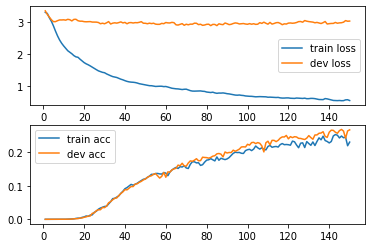

In [18]:
plot_log(log)